In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
cd /content/drive/"MyDrive/"

/content/drive/MyDrive


In [6]:

dataset = pd.read_csv('Colab Notebooks/Linear Regression/time_series_covid19_confirmed_global.csv')


In [7]:
dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393,1930428
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,469748,469748,471090,471414,471414,471414,471414,471414,472910,473302
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10130,10138,10143,10146,10152,10159,10178,10197,10197,10208
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,259677,261221,265479,269991,274087,278276,281576,282904,284389,287110


Analysing the dataset

In [8]:
dataset.shape

(280, 725)

In [9]:
type(dataset)

pandas.core.frame.DataFrame

In [10]:

dataf= pd.DataFrame(dataset)

In [11]:
dataf.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22
count,278.000000,278.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02
mean,20.156042,21.788955,1.989286,2.339286,3.360714,5.121429,7.564286,10.453571,19.921429,22.025000,...,1.036492e+06,1.045507e+06,1.054590e+06,1.063566e+06,1.072698e+06,1.083108e+06,1.090481e+06,1.097654e+06,1.109391e+06,1.119636e+06
std,25.283318,76.200169,26.590143,26.687678,33.225879,46.244243,64.627991,87.077220,213.666694,214.980193,...,4.374029e+06,4.432604e+06,4.476927e+06,4.514730e+06,4.559695e+06,4.611725e+06,4.639321e+06,4.667831e+06,4.744787e+06,4.788351e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.643279,-37.713675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.226250e+03,4.274750e+03,4.427000e+03,4.470000e+03,5.481750e+03,5.481750e+03,5.481750e+03,5.481750e+03,5.933250e+03,6.122750e+03
50%,21.517170,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.707450e+04,4.707450e+04,4.852150e+04,4.852150e+04,5.022350e+04,5.115200e+04,5.116100e+04,5.117100e+04,5.139950e+04,5.192350e+04
75%,40.393350,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.662142e+05,4.680545e+05,4.705850e+05,4.714190e+05,4.717288e+05,4.717288e+05,4.717288e+05,4.734375e+05,4.800868e+05,4.887740e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,5.510700e+07,5.627838e+07,5.707760e+07,5.770099e+07,5.848785e+07,5.938869e+07,5.976742e+07,6.009056e+07,6.155608e+07,6.230847e+07


In [12]:
col = list(dataset.columns.values)
print(col)

['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/2

In [13]:

col_value = (list(dataf.sum(axis = 0, skipna = True)))
#print(col_value)
df1 = pd.DataFrame(list(zip(col, col_value)),columns =['Title', 'Values'])

#df1.set_index('Title',inplace=True)
#print(df1)
#df1.drop(df1.index[["Province/State"]])

data = df1.drop(df1.index)
print(df1)



              Title                                             Values
0    Province/State  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1    Country/Region                                         5603.37955
2               Lat                                        6057.329414
3              Long                                                557
4           1/22/20                                                655
..              ...                                                ...
719          1/6/22                                          303270379
720          1/7/22                                          305334730
721          1/8/22                                          307343166
722          1/9/22                                          310629511
723         1/10/22                                          313498180

[724 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [14]:
col1 = list(df1.columns.values)
print(col1)


['Title', 'Values']


In [15]:
x_value=df1.iloc[4:,0:1]
y_value=df1.iloc[4:,1:2]

In [16]:
x_value

,Title
4,1/22/20
5,1/23/20
6,1/24/20
7,1/25/20
8,1/26/20
...,...
719,1/6/22
720,1/7/22
721,1/8/22
722,1/9/22


In [17]:

y_value

,Values
4,655
5,941
6,1434
7,2118
8,2927
...,...
719,303270379
720,305334730
721,307343166
722,310629511


In [18]:
#cleaning the dataset
#remove the na values
training_dataset=df1
cleaned_dataset=training_dataset.dropna()

In [19]:
cleaned_dataset.shape

(724, 2)

In [20]:
cleaned_dataset

,Title,Values
0,Province/State,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1,Country/Region,5603.37955
2,Lat,6057.329414
3,Long,557
4,1/22/20,655
...,...,...
719,1/6/22,303270379
720,1/7/22,305334730
721,1/8/22,307343166
722,1/9/22,310629511


In [21]:
x_new = cleaned_dataset['Title']

In [22]:
y_new = cleaned_dataset['Values']

In [23]:
x_value1=cleaned_dataset.iloc[4:,0:1]
y_value1=cleaned_dataset.iloc[4:,1:2]
print(x_value1)


       Title
4    1/22/20
5    1/23/20
6    1/24/20
7    1/25/20
8    1/26/20
..       ...
719   1/6/22
720   1/7/22
721   1/8/22
722   1/9/22
723  1/10/22

[720 rows x 1 columns]


In [24]:
x_train = x_value1.values.reshape(x_value1.size)

In [25]:
y_train = y_value1.values.reshape(y_value1.size)

In [26]:
dates = x_value1['Title']
#print(dates)
date_format = [pd.to_datetime(d) for d in dates]
print(date_format)

[Timestamp('2020-01-22 00:00:00'), Timestamp('2020-01-23 00:00:00'), Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-25 00:00:00'), Timestamp('2020-01-26 00:00:00'), Timestamp('2020-01-27 00:00:00'), Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'), Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'), Timestamp('2020-02-01 00:00:00'), Timestamp('2020-02-02 00:00:00'), Timestamp('2020-02-03 00:00:00'), Timestamp('2020-02-04 00:00:00'), Timestamp('2020-02-05 00:00:00'), Timestamp('2020-02-06 00:00:00'), Timestamp('2020-02-07 00:00:00'), Timestamp('2020-02-08 00:00:00'), Timestamp('2020-02-09 00:00:00'), Timestamp('2020-02-10 00:00:00'), Timestamp('2020-02-11 00:00:00'), Timestamp('2020-02-12 00:00:00'), Timestamp('2020-02-13 00:00:00'), Timestamp('2020-02-14 00:00:00'), Timestamp('2020-02-15 00:00:00'), Timestamp('2020-02-16 00:00:00'), Timestamp('2020-02-17 00:00:00'), Timestamp('2020-02-18 00:00:00'), Timestamp('2020-02-19 00:00:00'), Timestamp('20

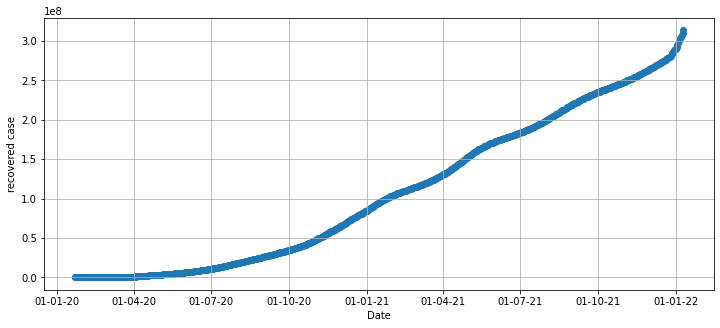

In [27]:
fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="recovered case")
date_form = DateFormatter('%d-%m-%y')
#print(date_form)
ax.xaxis.set_major_formatter(date_form)
#ax.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
plt.show()

In [28]:
df1['Time'] = np.arange(len(df1.index))

In [29]:
print(df1)

              Title                                             Values  Time
0    Province/State  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...     0
1    Country/Region                                         5603.37955     1
2               Lat                                        6057.329414     2
3              Long                                                557     3
4           1/22/20                                                655     4
..              ...                                                ...   ...
719          1/6/22                                          303270379   719
720          1/7/22                                          305334730   720
721          1/8/22                                          307343166   721
722          1/9/22                                          310629511   722
723         1/10/22                                          313498180   723

[724 rows x 3 columns]


In [30]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

# Training data
X = df1.loc[4:500, ['Time']]  # features
y = df1.loc[4:500, 'Values']  # target

reg = Lasso(alpha=1)
reg.fit(X,y)

y_pred1 = pd.Series(reg.predict(X), index=X.index)
print(y_pred1)

4     -3.452183e+07
5     -3.416359e+07
6     -3.380536e+07
7     -3.344712e+07
8     -3.308889e+07
           ...     
496    1.417300e+08
497    1.420883e+08
498    1.424465e+08
499    1.428048e+08
500    1.431630e+08
Length: 497, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

Time    356886.781776
dtype: float64

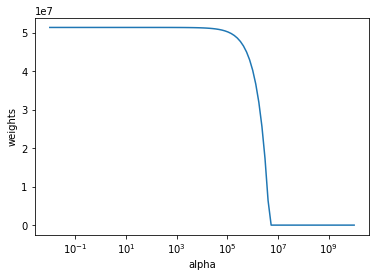

In [31]:
alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, y)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, y)
mean_squared_error(y, lasso.predict(X))
pd.Series(lasso.coef_, index=X.columns)



In [32]:
from sklearn.linear_model import LinearRegression

# Training data
X = df1.loc[4:500, ['Time']]  # features
y = df1.loc[4:500, 'Values']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

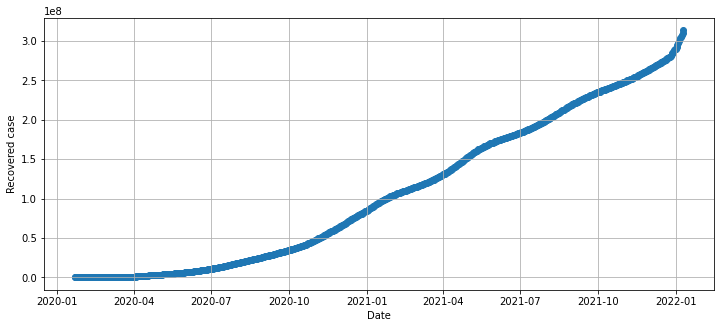

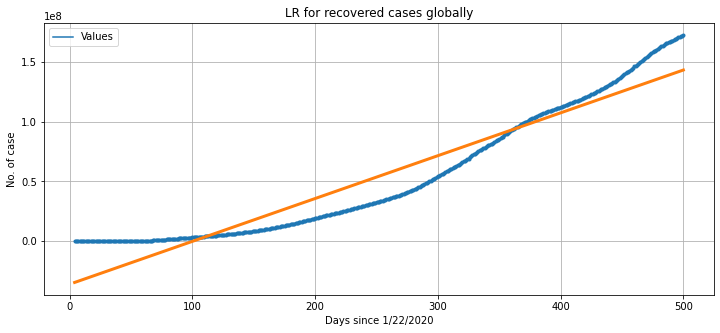

In [33]:
plot_params = dict(
    style=".-",
    legend=True,
)

fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="Recovered case")

fig, ax = plt.subplots(figsize=(12, 5 ))
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('LR for recovered cases globally');
ax.set(xlabel="Days since 1/22/2020",ylabel="No. of case")
ax.grid();

